# PRATICA_INDEPENDENTE: SVM - Solução.

#### Exercício 1: Carregue o arquivo `'bill_authentication.csv'` anexo, do banco de [banknote authentication](https://archive.ics.uci.edu/ml/datasets/banknote+authentication), Os dados foram extraídos de imagens que foram tiradas para a avaliação de um procedimento de autenticação para notas.

#### Os dados foram extraídos de imagens tiradas de dédulas genuínas e forjadas. Para a digitalização foi utilizada uma câmera industrial, usada para inspeção das notas. As imagens finais têm $400 \times 400$ pixels. Devido às lentes e à distância às notas foram obtidas imagens em escala de cinza com uma resolução de cerca de 660 dpi. Usou-se uma ferramente A ferramenta [Wavelet Transform](https://en.wikipedia.org/wiki/Wavelet_transform) foi usada para extrair recursos das imagens.

#### Faça o pré processamento dos dados, estudando sua forma, descrição e medidas centrais. Separe os dados entre atributos descritivos e targets e separe estes entre dados de treinamento e de teste.

#### Submeta os dados ao método `SVM` para a separação entre notas falsas e verdadeiras, usando como função de kernel o método `Linear`. Ajuste os dados e realize as previões de autenticidade, calculando a matrix de confusão dos dados e plote essas informações em um mapa de calor.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bankNoteAuth = pd.read_csv('bill_authentication.csv')

In [5]:
bankNoteAuth.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bankNoteAuth.shape

(1372, 5)

In [7]:
bankNoteAuth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
bankNoteAuth.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
bankNoteAuth['Class'].unique()

array([0, 1])

In [10]:
X = bankNoteAuth.drop('Class', axis = 1)
y = bankNoteAuth['Class']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20
                                                   )

In [12]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

svclassifier.fit(X_train, 
                 y_train
                )

SVC(kernel='linear')

In [13]:
y_pred = svclassifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[151   2]
 [  2 120]]


In [15]:
print(classification_report(y_test, 
                            y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.98      0.98      0.98       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



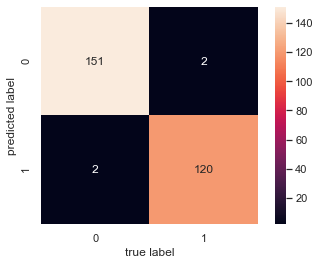

In [16]:
import seaborn as sns; sns.set()
#from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, 
                       y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.xlabel('true label')
plt.ylabel('predicted label');

#### Exercício 2: Carregue os dados do arquivo `'iris.csv'` em um dataframe e realize o pré processamento, separando os conjuntos de dados descritivos e targets. 

#### Faça o pré processamento dos dados, estudando sua forma, descrição e medidas centrais. Separe os dados entre atributos descritivos e targets e separe estes entre dados de treinamento e de teste.

#### Submeta os dados ao método `SVM` para a separação das espécies, com as funções de kernel  `Polynomial` , `RBF` e `Sigmoid`. Ajuste os dados e realize as previões de autenticidade, calculando a matrix de confusão dos dados e plote essas informações em um mapa de calor.

#### Compare os três métodos, concluindo qual deles tem o melhor retorno final.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
X = iris.drop('species', axis = 1)
y = iris['species']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Kernel polinomial

In [23]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'poly', 
                   degree = 8
                  )
svclassifier.fit(X_train, 
                 y_train
                )

SVC(degree=8, kernel='poly')

In [24]:
y_pred = svclassifier.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, 
                       y_pred
                      )
     )
print(classification_report(y_test, 
                            y_pred
                           )
     )

[[ 9  0  0]
 [ 0  7  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



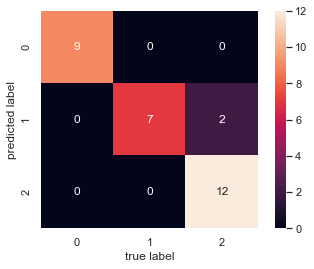

In [26]:
import seaborn as sns; sns.set()
#from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, 
                       y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.xlabel('true label')
plt.ylabel('predicted label');

### Kernel RBF

In [27]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'rbf'
                  )
svclassifier.fit(X_train, 
                 y_train
                )

SVC()

In [28]:
y_pred = svclassifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, 
                       y_pred
                      )
     )
print(classification_report(y_test, 
                            y_pred
                           )
     )

[[ 9  0  0]
 [ 0  7  0]
 [ 0  2 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       0.78      1.00      0.88         7
   virginica       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



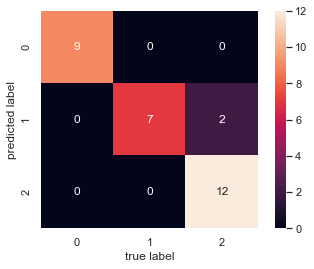

In [30]:
import seaborn as sns; sns.set()
#from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, 
                       y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.xlabel('true label')
plt.ylabel('predicted label');

### Kernel Sigmoid

In [31]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'sigmoid')

svclassifier.fit(X_train, 
                 y_train
                )

SVC(kernel='sigmoid')

In [32]:
y_pred = svclassifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, 
                       y_pred
                      )
     )

print(classification_report(y_test, 
                            y_pred, 
                            zero_division = 0
                           )
     )

[[ 0  9  0]
 [ 0  7  0]
 [ 0 14  0]]
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         9
  versicolor       0.23      1.00      0.38         7
   virginica       0.00      0.00      0.00        14

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30



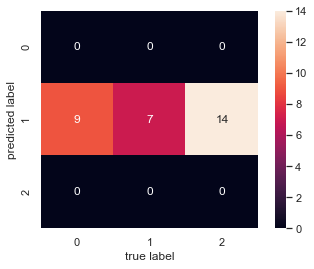

In [34]:
import seaborn as sns; sns.set()
#from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, 
                       y_pred
                      )
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = True
           )

plt.xlabel('true label')
plt.ylabel('predicted label');